# Unsupervised Learning and Feature Engineering 

In [1]:
# importing general libraries: 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import nltk


### Feature Selection 
To maintain a better overview, the part of Feature Selection is stored in a seperate File:

In [2]:
!python "feature_selection.py"


================================================== Hello and Welcome! ==================================================
=================================================== Loading Data... ====================================================
================== Data with Filename data/arxiv-metadata-oai-snapshot.json was loaded successfully. ===================
====================== Abstract, Title and Versions were collected. Looking for latest version... ======================
==================== Dates were extractet, checking now for samples newer than 2022-01-01 00:00:00. ====================
======================== Sucessfully dropped samples which are older than 2022-01-01 00:00:00. =========================
========================================== Checking for samples with no Data: ==========================================
title           0
abstract        0
version_keep    0
dtype: int64
====================================== Head of File will look like the following: ===

c:\Users\Slavka\Documents\Studium\UnsupervisedLearning\repo\feature_selection.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["latest_version"] = temp_frame[last_column-1]
c:\Users\Slavka\Documents\Studium\UnsupervisedLearning\repo\feature_selection.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["version_keep"] = date_parsed


In [2]:
# Read the Data:

filename = "data/data_selected.json"
df_raw = pd.read_json(filename, encoding="utf-8")

In [3]:
pd.options.mode.chained_assignment = None 

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

wordnet_lemmatizer = WordNetLemmatizer()

stop_words = set(stopwords.words("english"))
add_stopwords  = set(["large", "scale", "real", "world", "result", "show", "state", "art", "view", "based", "paper", "present", "conjecture", "fine",
                    "value", "zeroth", "zero", "sum", "able", "study", "ability", "achieve", "capture", "provide", "absolutely", "point", "grained",
                    "absolute", "value", "recommendation", "capture", "long", "one", "news", "accurate", "give", "carefully", "polynomial",
                    "using", "review", "describe", "detailed", "studied", "purpose", "article", "problem", "analysis", "analyze", "class",
                    "capable", "maximal", "minimal", "performed", "perform", "performing", "rigorous", "variety", "also", "number", 
                    "proof", "type", "condition", "needed", "explain", "single", "audience", "content", "process", "developed", "theorem",
                    "two", "three", "third", "four", "five", "six", "seven", "eight", "nine", "ten", "investigate", "precisely", "set",
                    "current", "observation", "analyzes", "last", "part", "author", "written", "describes", "whether", "non", "solution",
                    "allowing", "begin", "brief", "observables", "introduction", "described", "term", "answer", "question", "operator",
                    "outline", "outlines", "particular", "case", "proper", "serious", "let", "prove", "recent", "note", "determine", "future",
                    "good", "iteration", "second", "around", "suggestion", "many", "fit", "publish", "well", "used", "property", "research",
                    "propose", "application", "proposed", "method", "lower", "bound", "differential", "series", "end", "function", "design",
                    "equation", "high", "dimensional", "simulation", "section", "cross", "numerical", "wide", "range", "first", "algebra",
                    "order", "previous", "work", "driven", "open", "publicly", "available", "widely", "different", "upper", "year", "need", "conduct",
                    "quality", "proposes", "known", "novel", "prof", "introduce", "new", "way", "cost", "effective", "even", "group", "without",
                    "though", "find", "necessary", "sufficient", "interest", "take", "taken", "account", "recently", "introduced", "dimension", "experiment"
                    "make", "possible", "given", "finitely", "finite", "graph", "approach", "crucial", "role", "multiple", "output", "pre", "within"
                    "experimental", "demonstrate", "higher", "approach", "low", "address", "issue", "beyond", "left", "right", "handed", "extensive",
                    "however", "due", "strongly", "often", "best", "significantly", "better", "phys", "rev", "family", "use", "optimal", "challenging",
                    "model", "data", "system", "task", "performance", "representation", "general", "example", "parameter", "linear", "simple", "yet"])
#conduct experiment future research
stop_words = stop_words.union(add_stopwords)

def clean_text(text: str) -> str:

    lemmatizer = WordNetLemmatizer()
    text = text.lower()                                 # lower the text

    text = re.sub(r"(\\n+)"," ", text)                  # remove new lines 
    text = re.sub(r"(\\[a-z]+)"," ", text)              # remove all \ formatting 
    text = re.sub(r"\$(.*?)\$"," ", text)               # remove all $ $ formatting 
    text = re.sub(r"\{(.*?)\}"," ", text)               # remove all { } formatting 

    text = re.sub(r"http://\S+|https://\S+"," ", text)  # removing urls
    text = re.sub(r"[^a-z]", " ", text)                 # remove everything which aren't letters

    # removing certain phrases:

    text = text.replace("state of the art"," ")
    text = text.replace("error rate"," ")
    text = text.replace("closed form"," ")
    text = text.replace("fine tuning"," ")
    text = text.replace("fixed point"," ")
    text = text.replace("weak solution"," ")
    text = text.replace("domain adaptation"," ")
    text = text.replace("power law"," ")
    text = text.replace("positive integer"," ")
    text = text.replace("pre trained"," ")
    text = text.replace("multiple access"," ")
    text = text.replace("degree of freedom", " ")
    text = text.replace("degrees of freedom", " ")
    text = text.replace("make use of", " ")
    text = text.replace("play important role", " ")
    text = text.replace("near optimal", " ")
    text = text.replace("find optimal solution", " ")
    text = text.replace("find optimal solutions", " ")
    text = text.replace("finite number", " ")
    text = text.replace("finite numbers", " ")
    text = text.replace("infinite number", " ")
    text = text.replace("infinite numbers", " ")
    text = text.replace("closely related", " ")
    text = text.replace("van der", " ")
    text = text.replace("black box", " ")
    text = text.replace("trained","training")
    text = text.replace("explicit formula"," ")
    text = text.replace("optimal solution"," ")
    text = text.replace("image image","image")
    text = text.replace("standard model"," ")
    text = text.replace("room temperature"," ")
    text = text.replace("general solution"," ")
    text = text.replace("general solutions"," ")
    text = text.replace("model model","model")
    text = text.replace("datasets","dataset")
    text = text.replace("time dependent"," ")

    text = re.sub(r"\b\w{1,2}\b", " ", text)                # removing strings with 2 or less characters

    text = text.replace("schr odinger","schroedinger")      
    text = text.replace("schr  odinger","schroedinger")     # trying to give Mr. Schroedinger his name back :) 
    text = text.replace("schr   odinger","schroedinger")

    tokenized = re.split(r"\W+", text)                      # split text to tokens

    # lemmatize and keep tokens only if not in stop words:
    tokenized = [lemmatizer.lemmatize(word) for word in tokenized if word not in stop_words] 
    tokenized = [word for word in tokenized if word not in stop_words]

    text = " ".join(tokenized)                              # join text again

    return text

####################################################################################################################

# apply clean_text function to dataset with chunks to prevent allocation error:

from more_itertools import sliced
CHUNK_SIZE = 50000
chunk_list = []

index_slices = sliced(range(len(df_raw)), CHUNK_SIZE)
for chunk in sliced(df_raw, CHUNK_SIZE):
    chunk['clean_title']= chunk["title"].apply(lambda x:clean_text(x))
    chunk['clean_abstract']= chunk["abstract"].apply(lambda x:clean_text(x))
    chunk["concat"] = chunk["clean_abstract"].astype(str) + " " + chunk["clean_title"].astype(str)

    chunk = chunk.drop(columns="abstract")
    chunk = chunk.drop(columns="title")

    chunk = chunk.drop(columns="clean_abstract")
    chunk = chunk.drop(columns="clean_title")
    chunk_list.append(chunk)


df_clean = pd.concat(chunk_list)
df_clean.to_json("data/data_clean.json")


In [3]:
# Load Preprocessed Dataset: 
# some weird index errors occurs, so consider to run the cells above instead of this one, clustering results may differ..

df_clean = pd.read_json("data/data_clean.json", encoding="utf-8")

# Feature Engineering
#### Bag of Words:
The approach of BoW was mainly used for preprocessing steps (e.g. to filter out unrelated words)

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_bow = CountVectorizer(analyzer="word", ngram_range=(2,2), max_features=1000, lowercase=False)
bow_vectors = vectorizer_bow.fit_transform(df_clean["concat"])
bow_array = bow_vectors.toarray()
bow_terms = vectorizer_bow.get_feature_names()
sums = bow_vectors.sum(axis=0)

data = []
for col, term in enumerate(bow_terms):
    data.append( (term, sums[0,col] ))

ranking = pd.DataFrame(data, columns=['term','rank'])
print("\nRanking of words:\n", ranking.sort_values('rank', ascending=False)[15:])
print("\nRanking of words:\n", ranking.sort_values('rank', ascending=True)[15:])


#### TF-IDF:
TF-IDF is used to get the most important bi- and trigrams.

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the text data:
vectorizer_tfidf = TfidfVectorizer(norm = "l2", analyzer="word", ngram_range=(2,3), min_df = 5, max_df=0.99, max_features = 3000, lowercase=False)
tfidf_vectors = vectorizer_tfidf.fit_transform(df_clean["concat"])
tfidf_array = tfidf_vectors.toarray()
tfidf_terms = vectorizer_tfidf.get_feature_names_out()

# Looking for most important bi- and trigrams:
sums = tfidf_vectors.sum(axis=0)
data = []
for col, term in enumerate(tfidf_terms):
    data.append( (term, sums[0,col] ))
ranking = pd.DataFrame(data, columns=['term','rank'])

print("\nRanking of words:\n", ranking.sort_values('rank', ascending=False)[:20])
print(f"Number of samples: {tfidf_array.shape[0]}")
print(f"Percentage of nonzero cells: {np.count_nonzero(tfidf_array) / np.prod(tfidf_array.shape):.3f}") 


Ranking of words:
                          term         rank
1790           neural network  3611.793437
1492         machine learning  2762.430491
559             deep learning  2103.058525
225                black hole  1674.962477
1503           magnetic field  1517.702735
2209   reinforcement learning  1443.848063
518               dark matter  1202.469138
1682              monte carlo  1084.961612
921              field theory  1054.324013
1934         phase transition  1028.258934
1737         natural language   920.746781
565               deep neural   823.334095
2340          self supervised   818.743102
566       deep neural network   792.934353
1072       gravitational wave   720.172080
549           decision making   704.849121
147   artificial intelligence   701.506597
1386       learning algorithm   681.780081
1844         object detection   656.752950
897        federated learning   655.716538
Number of samples: 200853
Percentage of nonzero cells: 0.002


# K-Means
Using K-Means algorithm for clustering process.

### Dimensionality Reduction with SVD/LSA
Also possible to run without Dim-Reduction, but the clustering results improve with this one.

In [10]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

# reduce the features to 300:
n_components = 300

# calling SVD and normalize:
svd = TruncatedSVD(n_components, random_state=70)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
tfidf_lsa = lsa.fit_transform(tfidf_array)

print("Explained variance of the SVD step: {}%".format(int(svd.explained_variance_ratio_.sum() * 100)))

Explained variance of the SVD step: 32%


#### Elbow Method
Using the ElBow Method to determine the optimal number of clusters.

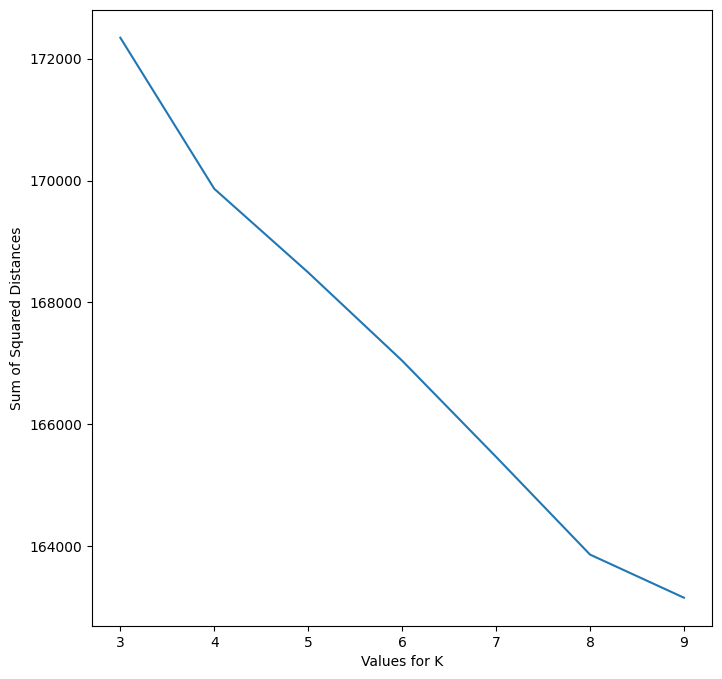

In [11]:
from sklearn.cluster import KMeans

# calculate the sum of squared distances for several k and plot the results:
fig = plt.figure(figsize=(8,8))
within_cluster_squares={}
for i in range(3,10):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42).fit(tfidf_lsa)
    within_cluster_squares[i] = kmeans.inertia_
plt.plot(list(within_cluster_squares.keys()),list(within_cluster_squares.values()))
plt.xlabel('Values for K')
plt.ylabel('Sum of Squared Distances')
plt.grid(False)

plt.savefig("pics/ellbow.png", dpi=120)
plt.show()

### Silhouette Score
Additionally, using the Silhouette Score for further analyzes of the optimal number of clusters.

In [7]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# get average Silhouette Scores for different number of clusters: 
for n_clusters in range(3, 10):
    clusterer = KMeans(init="k-means++", n_init=1, n_clusters=n_clusters, max_iter=10, random_state=42) 
    y = clusterer.fit_predict(tfidf_lsa)
    print(f"For n_clusters = {n_clusters} the average silhouette score is: {silhouette_score(tfidf_lsa, y)}")



For n_clusters = 3 the average silhouette score is: 0.041065930724364284
For n_clusters = 4 the average silhouette score is: 0.04205251866383679
For n_clusters = 5 the average silhouette score is: 0.03910944853287138
For n_clusters = 6 the average silhouette score is: 0.04394617089184873
For n_clusters = 7 the average silhouette score is: 0.043714507664166694
For n_clusters = 8 the average silhouette score is: 0.049559724033497975
For n_clusters = 9 the average silhouette score is: 0.05229992270930322


c:\Users\Slavka\Anaconda\Anaconda\envs\uslpy39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


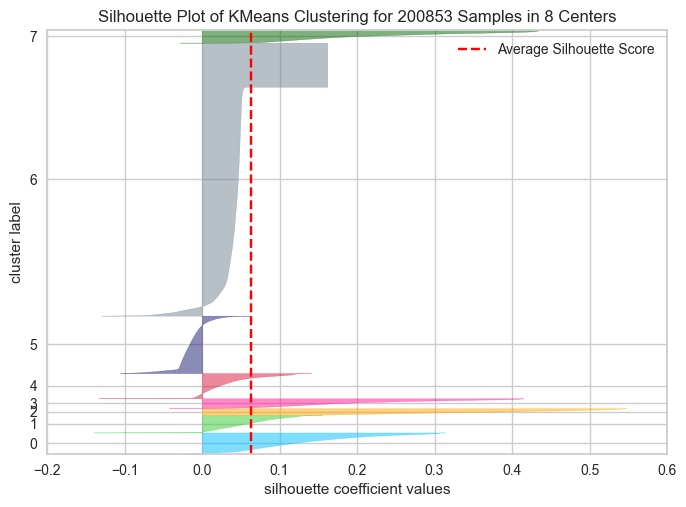

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 200853 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [191]:
# this cell may won't run if you installed the pyLDAvis requirements.

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
colours = ["deepskyblue", "limegreen", "orange", "deeppink" , "crimson", "midnightblue", "slategrey", "darkgreen", "red"]

# plot distributed Silhouette Score in graph: 
model = KMeans(n_clusters = 8, random_state=42).fit(tfidf_lsa)
visualizer = SilhouetteVisualizer(model, colors=colours)
visualizer.fit(tfidf_lsa)
visualizer.show()

### Clustering 
Applying K-Means clustering

In [8]:
from sklearn.cluster import KMeans
n_clusters = 8

# Clustering the reduced features with K-Means and append the respective cluster to the dataset:
kmeans = KMeans(n_clusters=n_clusters, n_init=50, random_state=42)
kmean_indices = kmeans.fit_predict(tfidf_lsa)
df_clean['kmeans'] = kmean_indices

In [12]:
# print the most important words per cluster in a dataframe and save it to a .csv file:

clusters = kmeans.labels_                                       # Labels
k_centers = kmeans.cluster_centers_                             # Coordinates of cluster centers

original_space_centroids = svd.inverse_transform(k_centers)     # transform to the original feature space
order_centroids = original_space_centroids.argsort()[:, ::-1]   # and sort them

lsa_cluster_topics = {}
results_dict = {}

for i in range(n_clusters):
    terms_list = []

    for idx in order_centroids[i, :15]:  
        terms_list.append(tfidf_terms[idx])
    results_dict[f"Cluster {i}"] = terms_list

df_clusters = pd.DataFrame.from_dict(results_dict)
df_clusters.to_csv("model/kmeans.csv")
df_clusters

Cluster 0            Cluster 1  \
0                 neural network          dark matter   
1                    deep neural       star formation   
2            deep neural network      radial velocity   
3           convolutional neural         star forming   
4   convolutional neural network         stellar mass   
5                  deep learning        emission line   
6               machine learning      space telescope   
7               network training        main sequence   
8           network architecture          white dwarf   
9                   network gnns         massive star   
10           neural network gnns           line sight   
11       neural network training     globular cluster   
12                  network dnns        near infrared   
13           neural network dnns       forming galaxy   
14              recurrent neural  star forming galaxy   

                  Cluster 2                   Cluster 3  \
0                black hole               deep learning   
1        gravitational wave              neural network   
2   supermassive black hole            machine learning   
3        supermassive black          learning technique   
4     primordial black hole     deep learning technique   
5          primordial black          learning framework   
6             event horizon     deep learning framework   
7                 hole mass             computer vision   
8           black hole mass          learning algorithm   
9              scalar field     deep learning algorithm   
10             binary black     artificial intelligence   
11        binary black hole       learning architecture   
12             neutron star  deep learning architecture   
13              dark matter              time consuming   
14                 ad black                ground truth   

                    Cluster 4                Cluster 5  \
0              magnetic field         natural language   
1            phase transition          self supervised   
2        electronic structure        benchmark dataset   
3            transition metal         object detection   
4          density functional        compared existing   
5                    band gap      attention mechanism   
6              band structure     contrastive learning   
7           functional theory           knowledge base   
8   density functional theory           self attention   
9                 hall effect     experiment conducted   
10                 spin orbit           multi learning   
11      principle calculation        weakly supervised   
12     transition temperature            shot learning   
13              phase diagram        evaluation metric   
14               quantum spin  significant improvement   

                 Cluster 6                   Cluster 7  
0   reinforcement learning            machine learning  
1              monte carlo          learning algorithm  
2             field theory  machine learning algorithm  
3      quantum information              neural network  
4   optimization algorithm  machine learning technique  
5               space time          learning technique  
6          decision making     artificial intelligence  
7         convergence rate               random forest  
8               mean field               decision tree  
9       federated learning             decision making  
10      bayesian inference          learning framework  
11           hilbert space            training machine  
12       classical quantum   training machine learning  
13          boundary layer  machine learning framework  
14      gravitational wave          federated learning

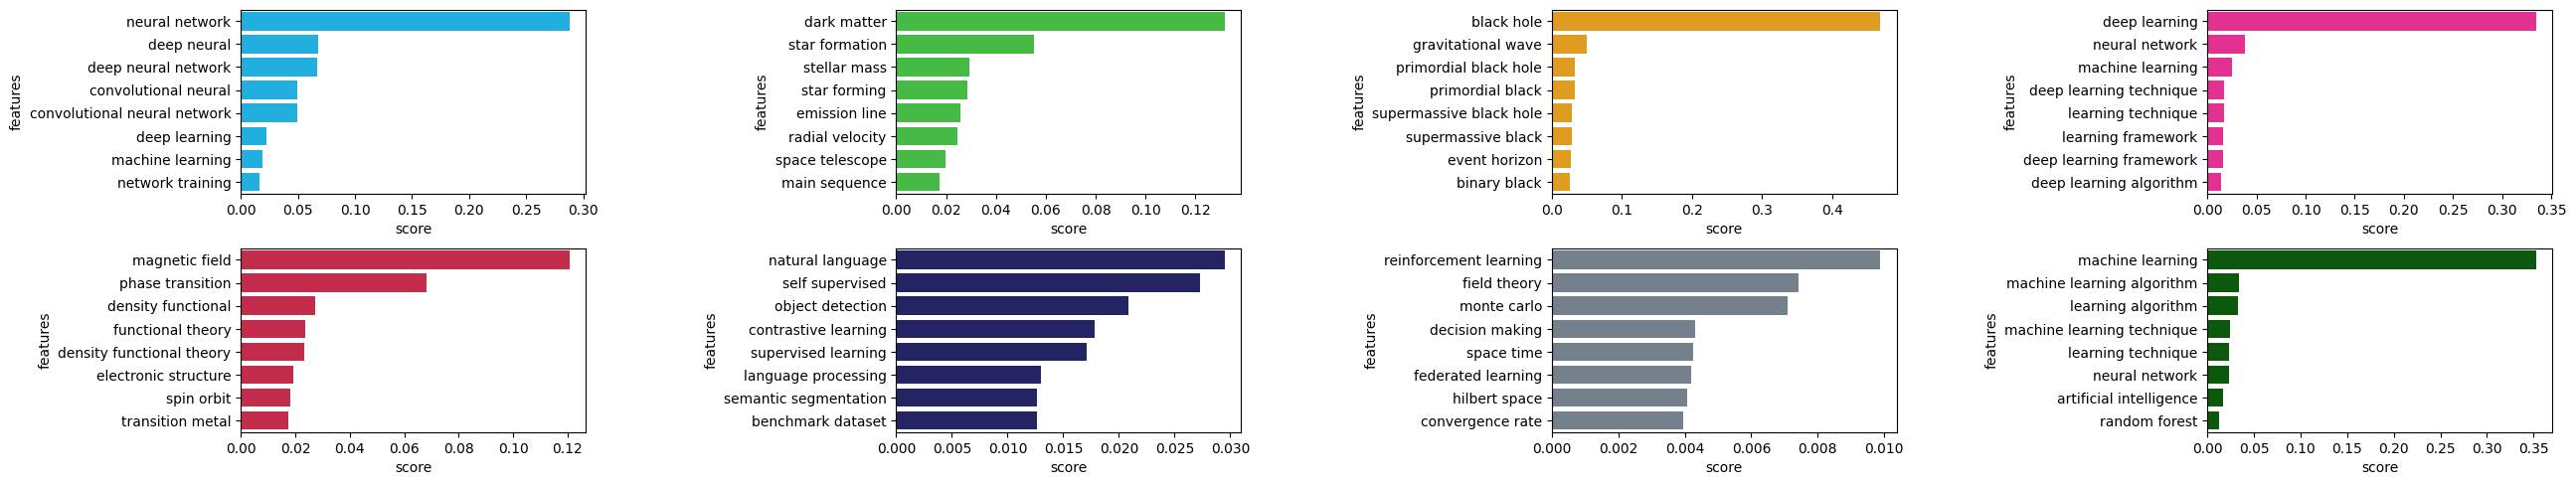

In [9]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):        # retrieved from https://towardsdatascience.com/k-means-clustering-8e1e64c1561c 
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer_tfidf.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


# show the score of the most important bi- and trigrams of the respective clusters:
dfs = get_top_features_cluster(tfidf_vectors.toarray(), kmean_indices, 8)

colours = ["deepskyblue", "limegreen", "orange", "deeppink" , "crimson", "midnightblue", "slategrey", "darkgreen", "red"]

fig, axs = plt.subplots(nrows = 2, ncols=4, figsize=(30, 5))
axs = axs.flatten()

for i in range(0, len(dfs)):
    ax = axs[i]
    sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:10], ax=axs[i], color=colours[i])

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.savefig("pics/scorewordskmeans.png", dpi=120)

plt.show()



### Visualize

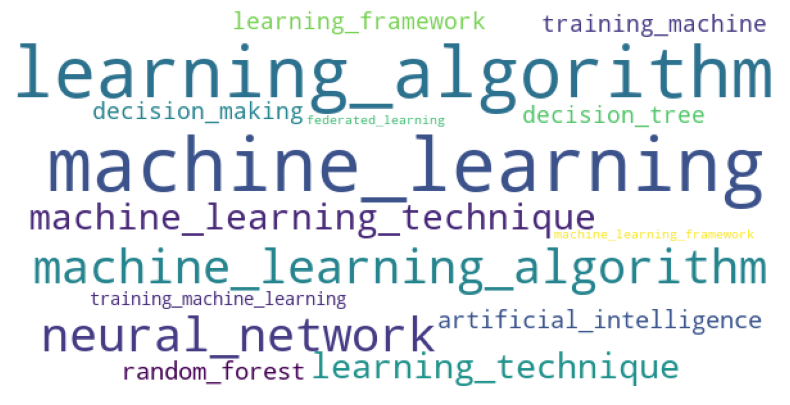

In [24]:
from wordcloud import WordCloud

# visualize the most important topics with wordcloud library:
clouds = [word.replace(" ", "_") for word in df_clusters[f"Cluster 7"]]
wordcloud = WordCloud(background_color="white",width=600, height=300).generate(' '.join(clouds))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("pics/kmeans7.png", dpi=60)

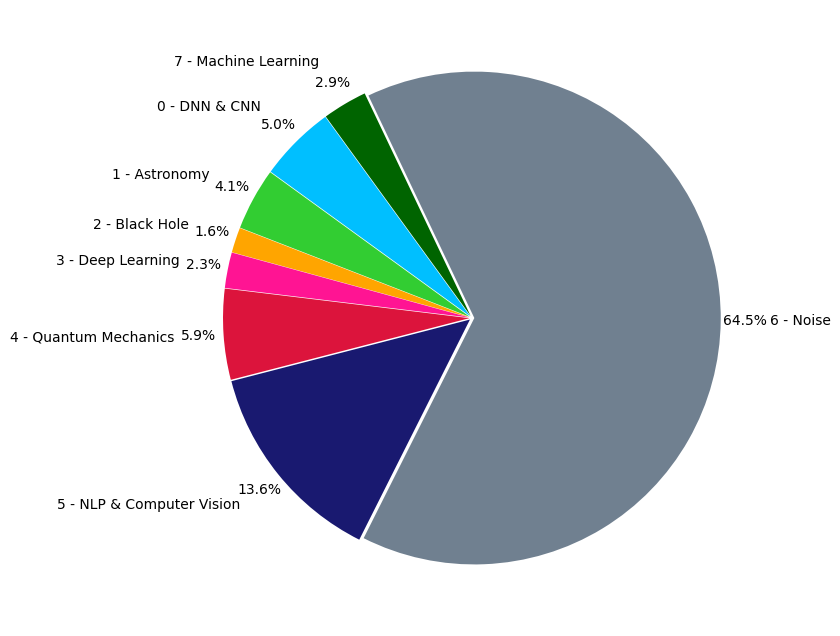

In [29]:
# visualize the sizes of the clusters in a pie diagram:

size_cl0 =df_clean["kmeans"].value_counts()[0]
size_cl1 =df_clean["kmeans"].value_counts()[1]
size_cl2 =df_clean["kmeans"].value_counts()[2]
size_cl3 =df_clean["kmeans"].value_counts()[3]
size_cl4 =df_clean["kmeans"].value_counts()[4]
size_cl5 =df_clean["kmeans"].value_counts()[5]
size_cl6 =df_clean["kmeans"].value_counts()[6]
size_cl7 =df_clean["kmeans"].value_counts()[7]

plt.figure( figsize=(8,8))
cluster_sizes = np.array([size_cl0, size_cl1, size_cl2, size_cl3, size_cl4, size_cl5, size_cl6, size_cl7])

label = ["0 - DNN & CNN", 
        "1 - Astronomy", 
        "2 - Black Hole", 
        "3 - Deep Learning", 
        "4 - Quantum Mechanics", 
        "5 - NLP & Computer Vision", 
        "6 - Noise",
        "7 - Machine Learning"] 
expl = [0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]

plt.pie(cluster_sizes, labels=label, labeldistance = 1.2, startangle=126,
        autopct='%1.1f%%', pctdistance=1.1, colors=["deepskyblue", "limegreen", "orange", "deeppink" , "crimson", "midnightblue", "slategrey", "darkgreen"], explode=expl)
plt.savefig("pics/piekmeans.png", dpi=180)
plt.show()

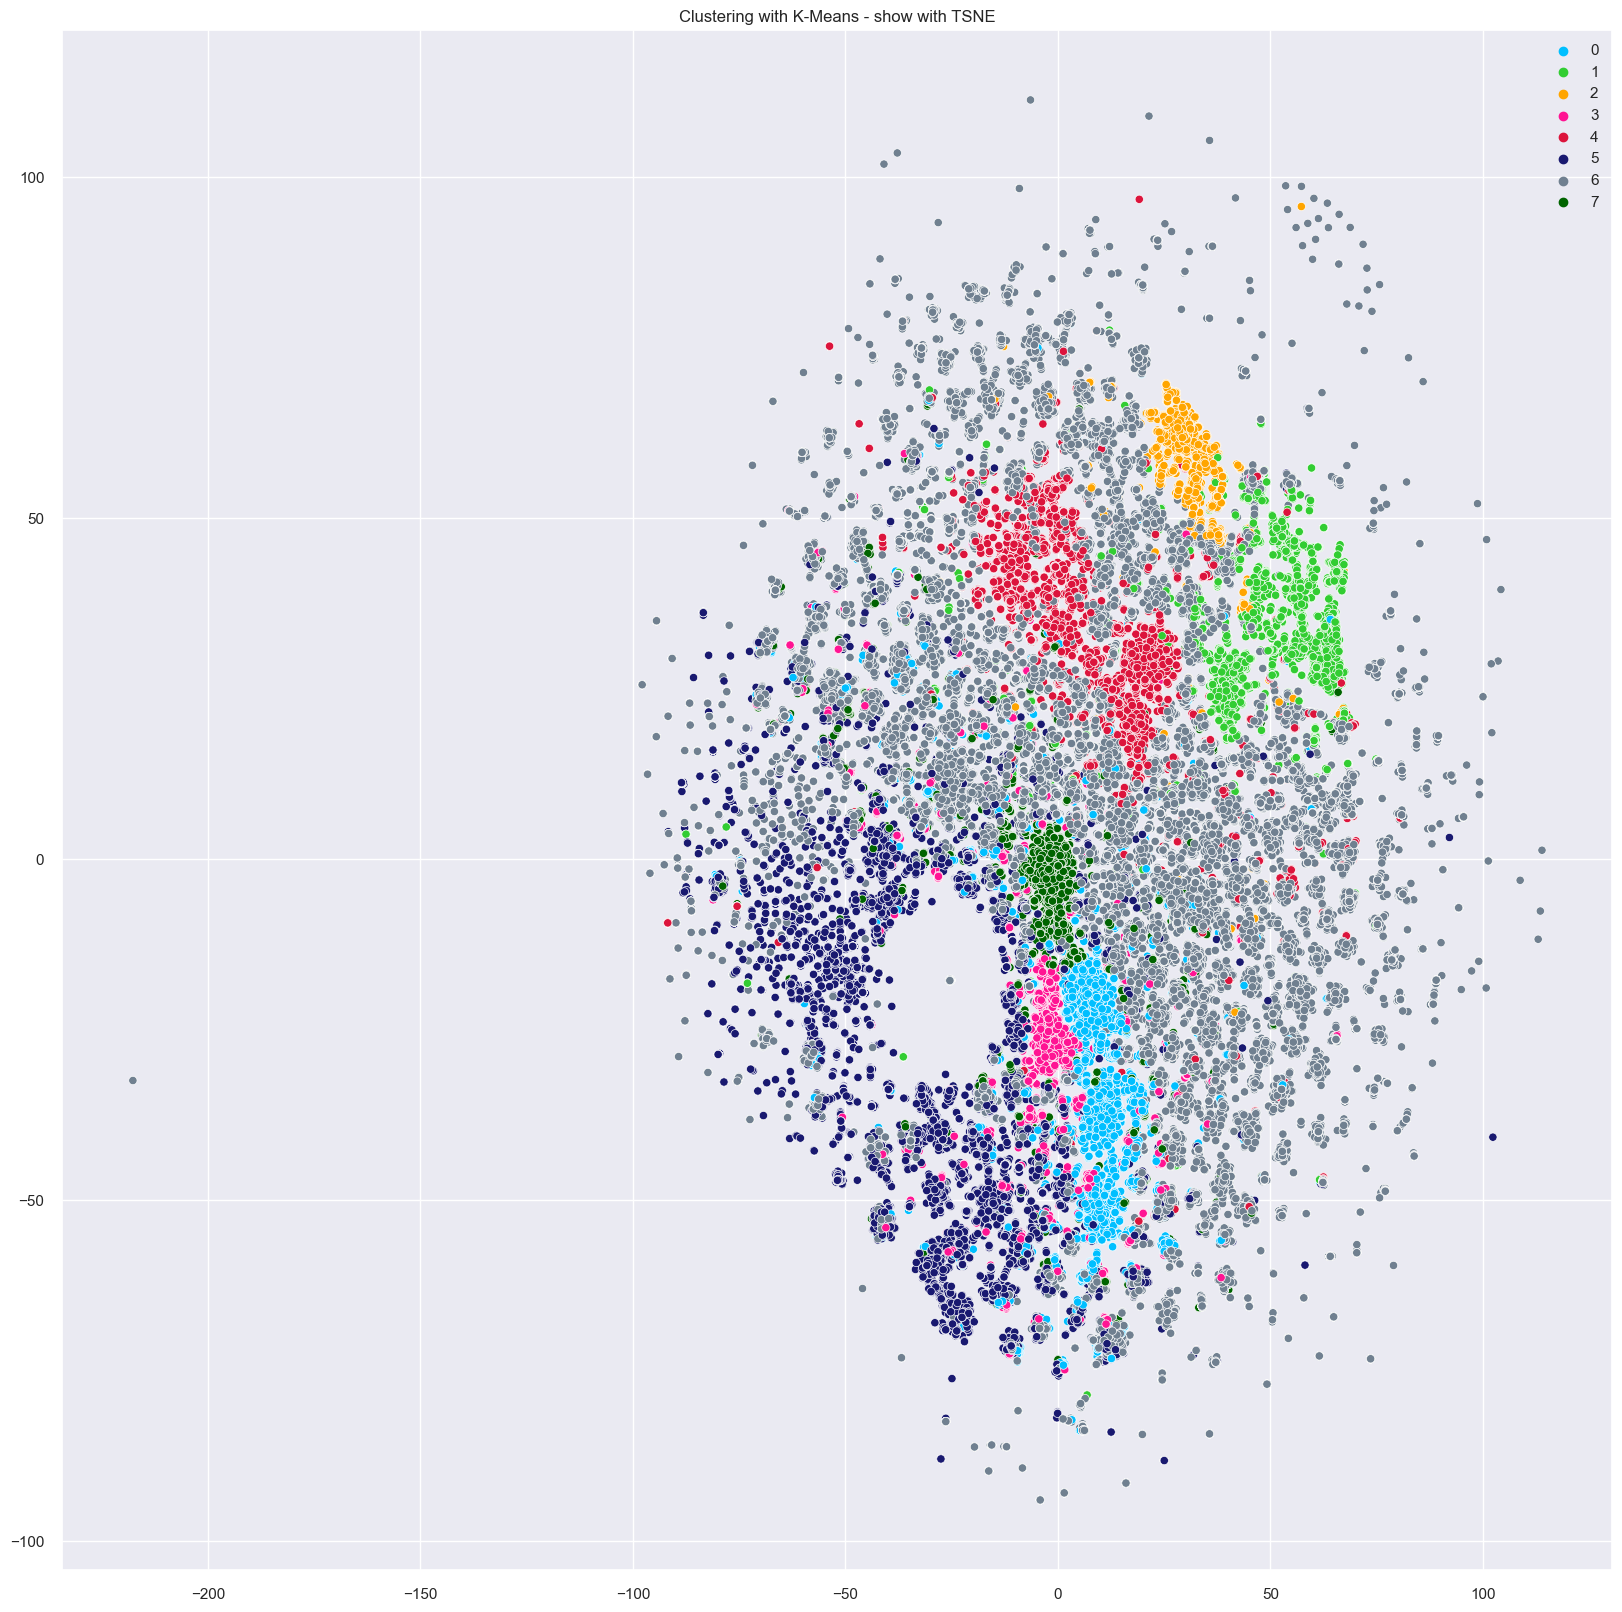

In [217]:
from sklearn.manifold import TSNE

# plot the results in a 2D-space with t-SNE:
tsne = TSNE(n_components=2, verbose=0, perplexity=40)
X_embedded_tsne = tsne.fit_transform(tfidf_lsa)

sns.set(rc={"figure.figsize":(20,20)})
colours= ["deepskyblue", "limegreen", "orange", "deeppink" , "crimson", "midnightblue", "slategrey", "darkgreen"]         # using colours of the silhoutte score graph results 
sns.scatterplot(x= X_embedded_tsne[:,0], y= X_embedded_tsne[:,1], hue=list(df_clean["kmeans"]), legend="full", palette=colours)
plt.title("Clustering with K-Means - show with TSNE")
plt.savefig("pics/kmeanstsne.png", dpi=300)
plt.show()

# LDA

### Coherence Score

In [30]:
import tmtoolkit
from tmtoolkit.topicmod.evaluate import metric_coherence_gensim
from sklearn.decomposition import LatentDirichletAllocation

norm_corpus_tokens = np.array([ngram for ngram in tfidf_terms])
lda_models = []
coherence_scores = []
idx = 0
for i in range(1, 11):
    temp_lda = LatentDirichletAllocation(n_components=i,
                                        max_iter=100,
                                        random_state=0)
    temp_lda.fit_transform(tfidf_vectors)
    temp_coherence_score = metric_coherence_gensim(measure='u_mass', top_n=4, topic_word_distrib=temp_lda.components_, dtm=tfidf_vectors, vocab=np.array(tfidf_terms))
    lda_models.append(temp_lda)
    coherence_scores.append(np.mean(temp_coherence_score))
    print(f"For {i} clusters, the mean coherence score is: {temp_coherence_score[idx]}")
    idx += 1


For 1 clusters, the mean coherence score is: -3.939879047119309
For 2 clusters, the mean coherence score is: -3.716881071914242
For 3 clusters, the mean coherence score is: -3.4488630604943515
For 4 clusters, the mean coherence score is: -3.1153560522142167
For 5 clusters, the mean coherence score is: -2.9036555432114555
For 6 clusters, the mean coherence score is: -8.062618598736533
For 7 clusters, the mean coherence score is: -3.1075146363495545
For 8 clusters, the mean coherence score is: -4.7824220681697485
For 9 clusters, the mean coherence score is: -3.964193520273613
For 10 clusters, the mean coherence score is: -2.0703468550965485


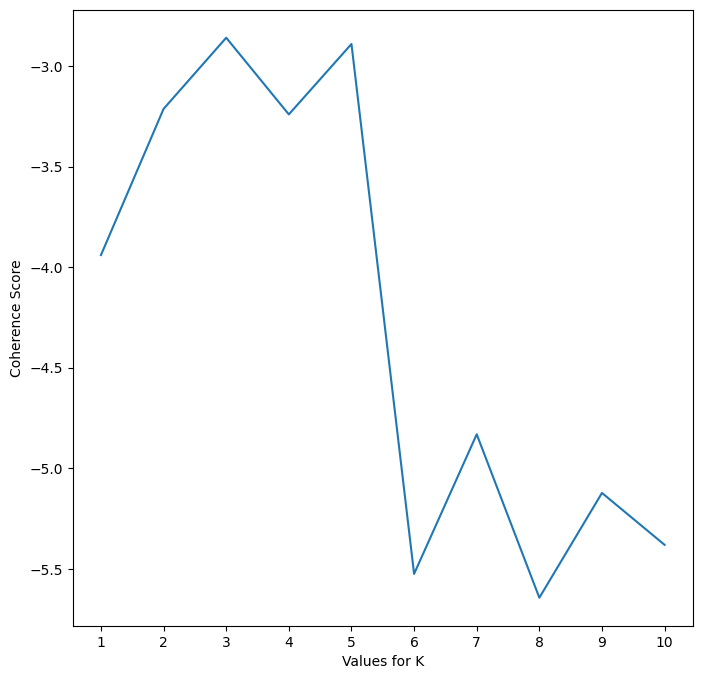

In [32]:
# Plot the coherence score for several number of clusters:
coherence_df = pd.DataFrame({
    "number_clusters": [str(i) for i in range(1,11)],
    "coherence_score": np.round(coherence_scores, 4)
})

fig = plt.figure(figsize=(8,8))
coherence_score_dict={}
plt.plot(list(coherence_df["number_clusters"]),list(coherence_df["coherence_score"]))
plt.xlabel("Values for K")
plt.ylabel("Coherence Score")
plt.grid(False)

plt.savefig("pics/coherence.png", dpi=120)
plt.show()

### Clustering

In [14]:
from sklearn.decomposition import LatentDirichletAllocation

# use LDA for clustering:
lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tfidf.fit(tfidf_vectors)

LatentDirichletAllocation(n_components=5, random_state=0)

In [34]:
# Append the respective cluster to the dataset and show most important bi- and trigrams in a dataframe:

topic_results = lda_tfidf.fit_transform(tfidf_array) 
df_clean["LDA"] = topic_results.argmax(axis=1)

results_dict = {}
for index, component in enumerate(lda_tfidf.components_):
    zipped = zip(tfidf_terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    top_terms_list=list(dict(top_terms_key).keys())
    results_dict[f"Cluster {index} "] = [top_terms_list[i] for i in range(10)]

df_clusters = pd.DataFrame.from_dict(results_dict)
df_clusters

Cluster 0                    Cluster 1   \
0         machine learning             natural language   
1   reinforcement learning          language processing   
2          decision making                social medium   
3       federated learning  natural language processing   
4       learning algorithm                 vector field   
5         convergence rate                 latent space   
6  artificial intelligence       generative adversarial   
7           neural network         contrastive learning   
8              multi agent         existence uniqueness   
9             time varying          adversarial network   

                     Cluster 2            Cluster 3           Cluster 4   
0                neural network       magnetic field          black hole  
1                 deep learning       electric field         dark matter  
2                   deep neural         metric space        field theory  
3           deep neural network   density functional    phase transition  
4              object detection            thin film  gravitational wave  
5          convolutional neural      quantum circuit          space time  
6  convolutional neural network     quantum computer        scalar field  
7                star formation    quantum computing       modulus space  
8              machine learning           spin orbit       hilbert space  
9               computer vision  quantum information       navier stokes

### Visualize
Show Pie, 2D Diagram, Most important terms per cluster and the Direchlet Distribution in 3D

In [10]:
# visualize with pyLDAvis - this cell may won't run if you decided to use the requirements.txt for yellowbrick. 
# but the results are also retrievable from model/lda.html.

import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

visualize = pyLDAvis.sklearn.prepare(lda_model = lda_tfidf, dtm= tfidf_vectors, vectorizer=vectorizer_tfidf)
pyLDAvis.save_html(visualize, "model/lda.html")

c:\Users\Slavka\Anaconda\Anaconda\envs\uslscikit\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


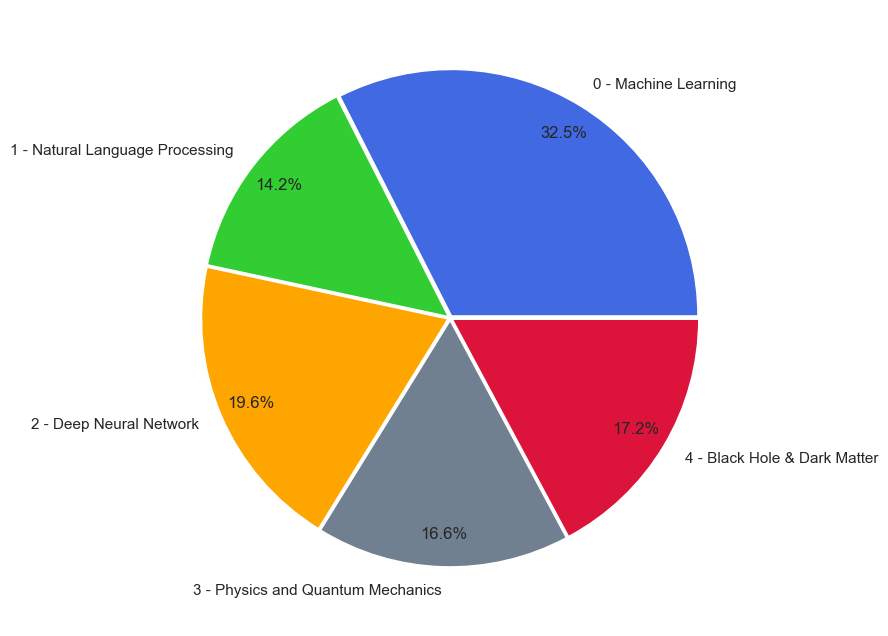

In [36]:
# visualize the sizes of the clusters in a pie diagram:

size_cl0 =df_clean["LDA"].value_counts()[0]
size_cl1 =df_clean["LDA"].value_counts()[1]
size_cl2 =df_clean["LDA"].value_counts()[2]
size_cl3 =df_clean["LDA"].value_counts()[3]
size_cl4 =df_clean["LDA"].value_counts()[4]

plt.figure( figsize=(10,8))

cluster_sizes = np.array([size_cl0, size_cl1, size_cl2, size_cl3, size_cl4])
label = ["0 - Machine Learning", 
        "1 - Natural Language Processing", 
        "2 - Deep Neural Network", 
        "3 - Physics and Quantum Mechanics", 
        "4 - Black Hole & Dark Matter"]

expl = [0.01, 0.01, 0.01, 0.01, 0.01]

plt.pie(cluster_sizes, labels=label, autopct='%1.1f%%', pctdistance=0.87, colors=["royalblue", "limegreen", "orange", "slategrey" , "crimson"], explode=expl)
plt.savefig("pics/pielda.png", dpi=120)
plt.show()


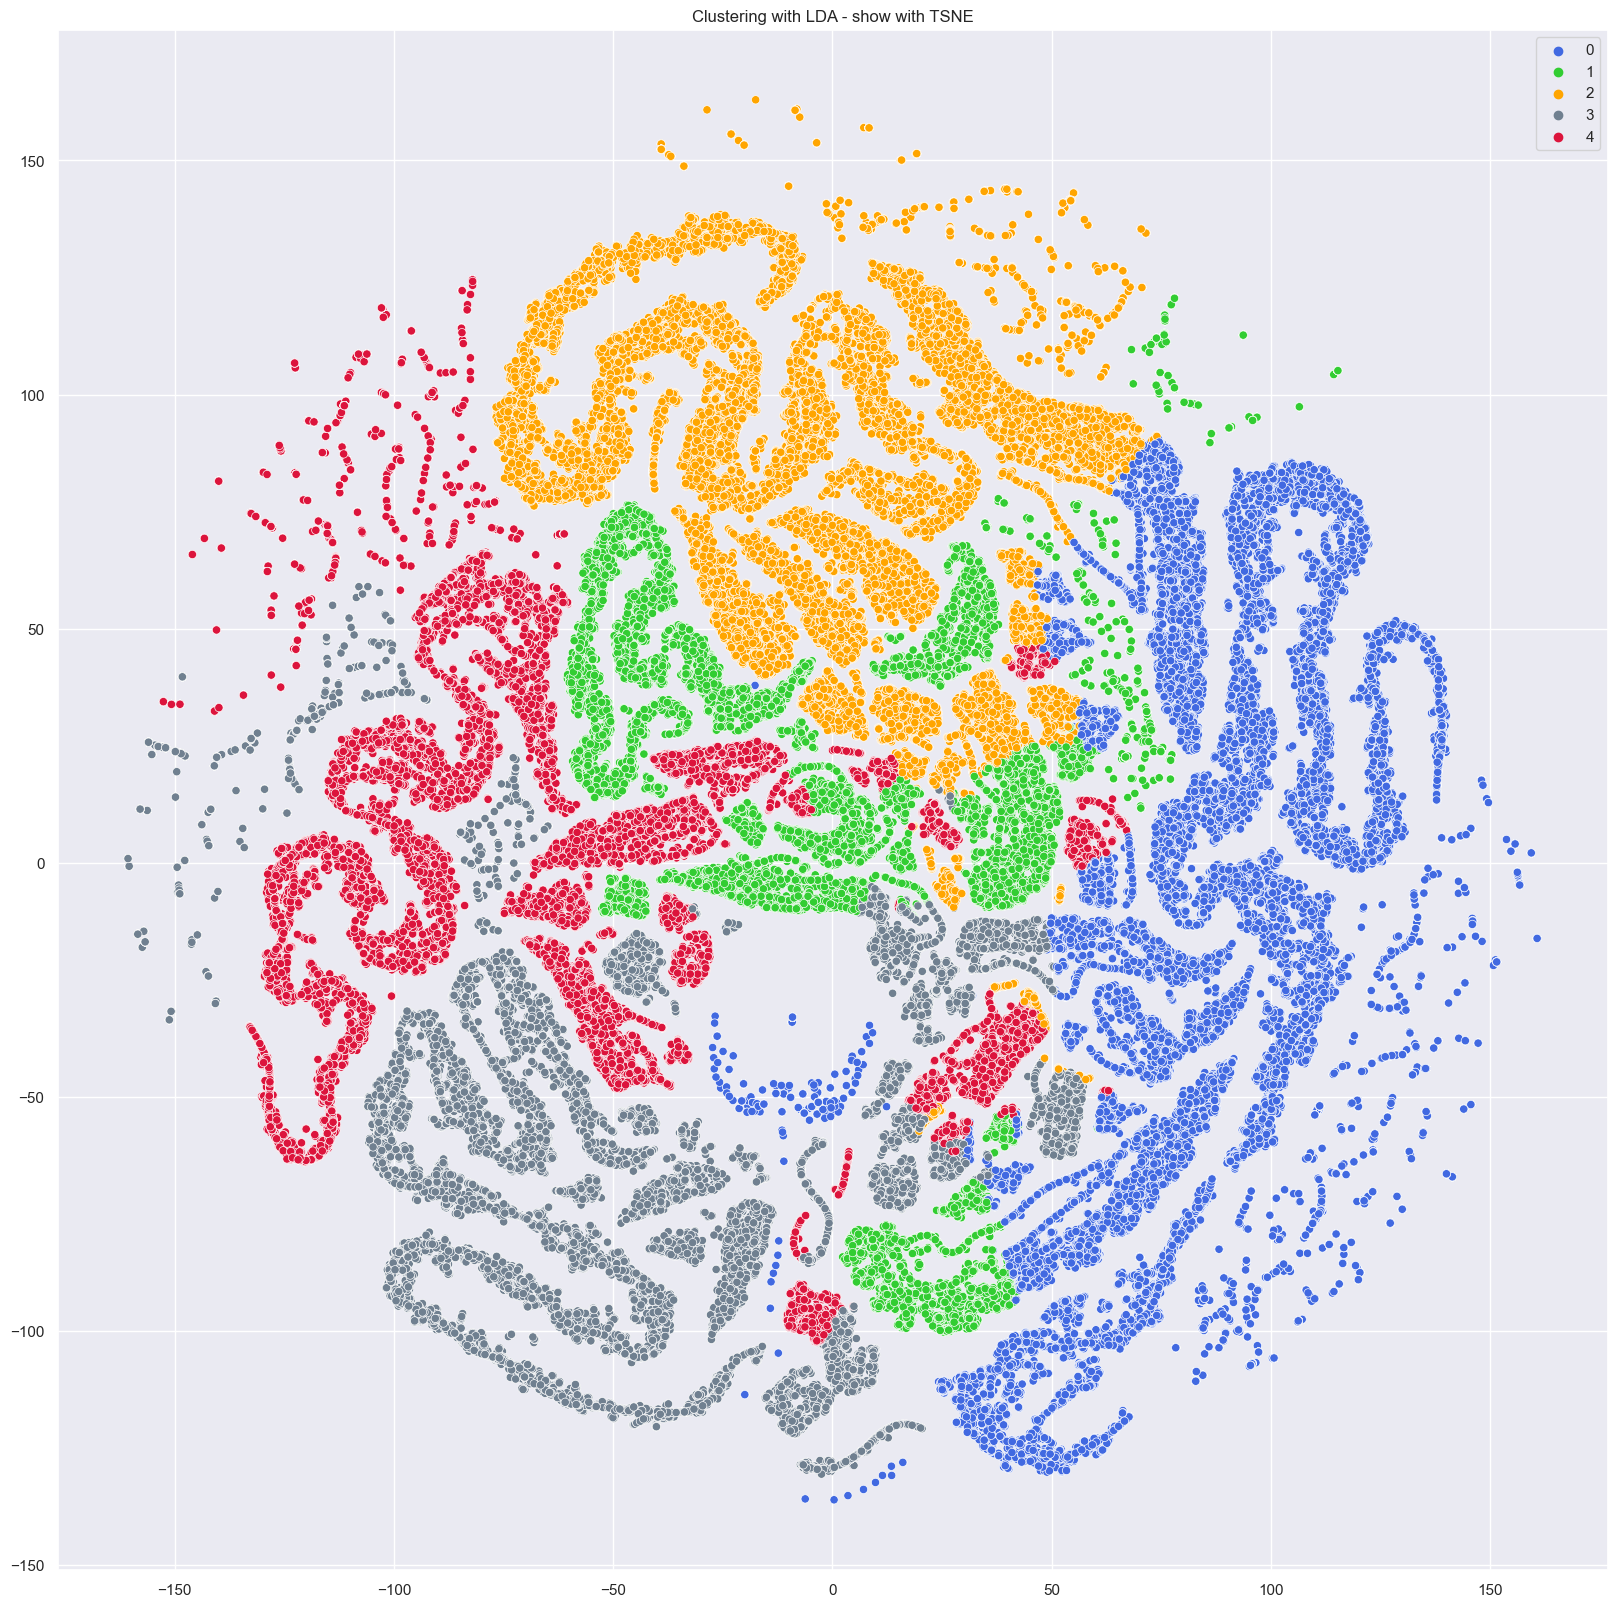

In [25]:
from sklearn.manifold import TSNE

# plot the results in a 2D-space with t-SNE:
tsne = TSNE(n_components=2, verbose=0, perplexity=40)
X_embedded_tsne = tsne.fit_transform(topic_results)

sns.set(rc={"figure.figsize":(20,20)})   
sns.scatterplot(x= X_embedded_tsne[:,0], y= X_embedded_tsne[:,1], hue=list(df_clean["LDA"]), legend="full", palette=["royalblue", "limegreen", "orange", "slategrey" , "crimson"])
plt.title("Clustering with LDA - show with TSNE")
plt.savefig("pics/LDAtsne.png", dpi=300)
plt.show()

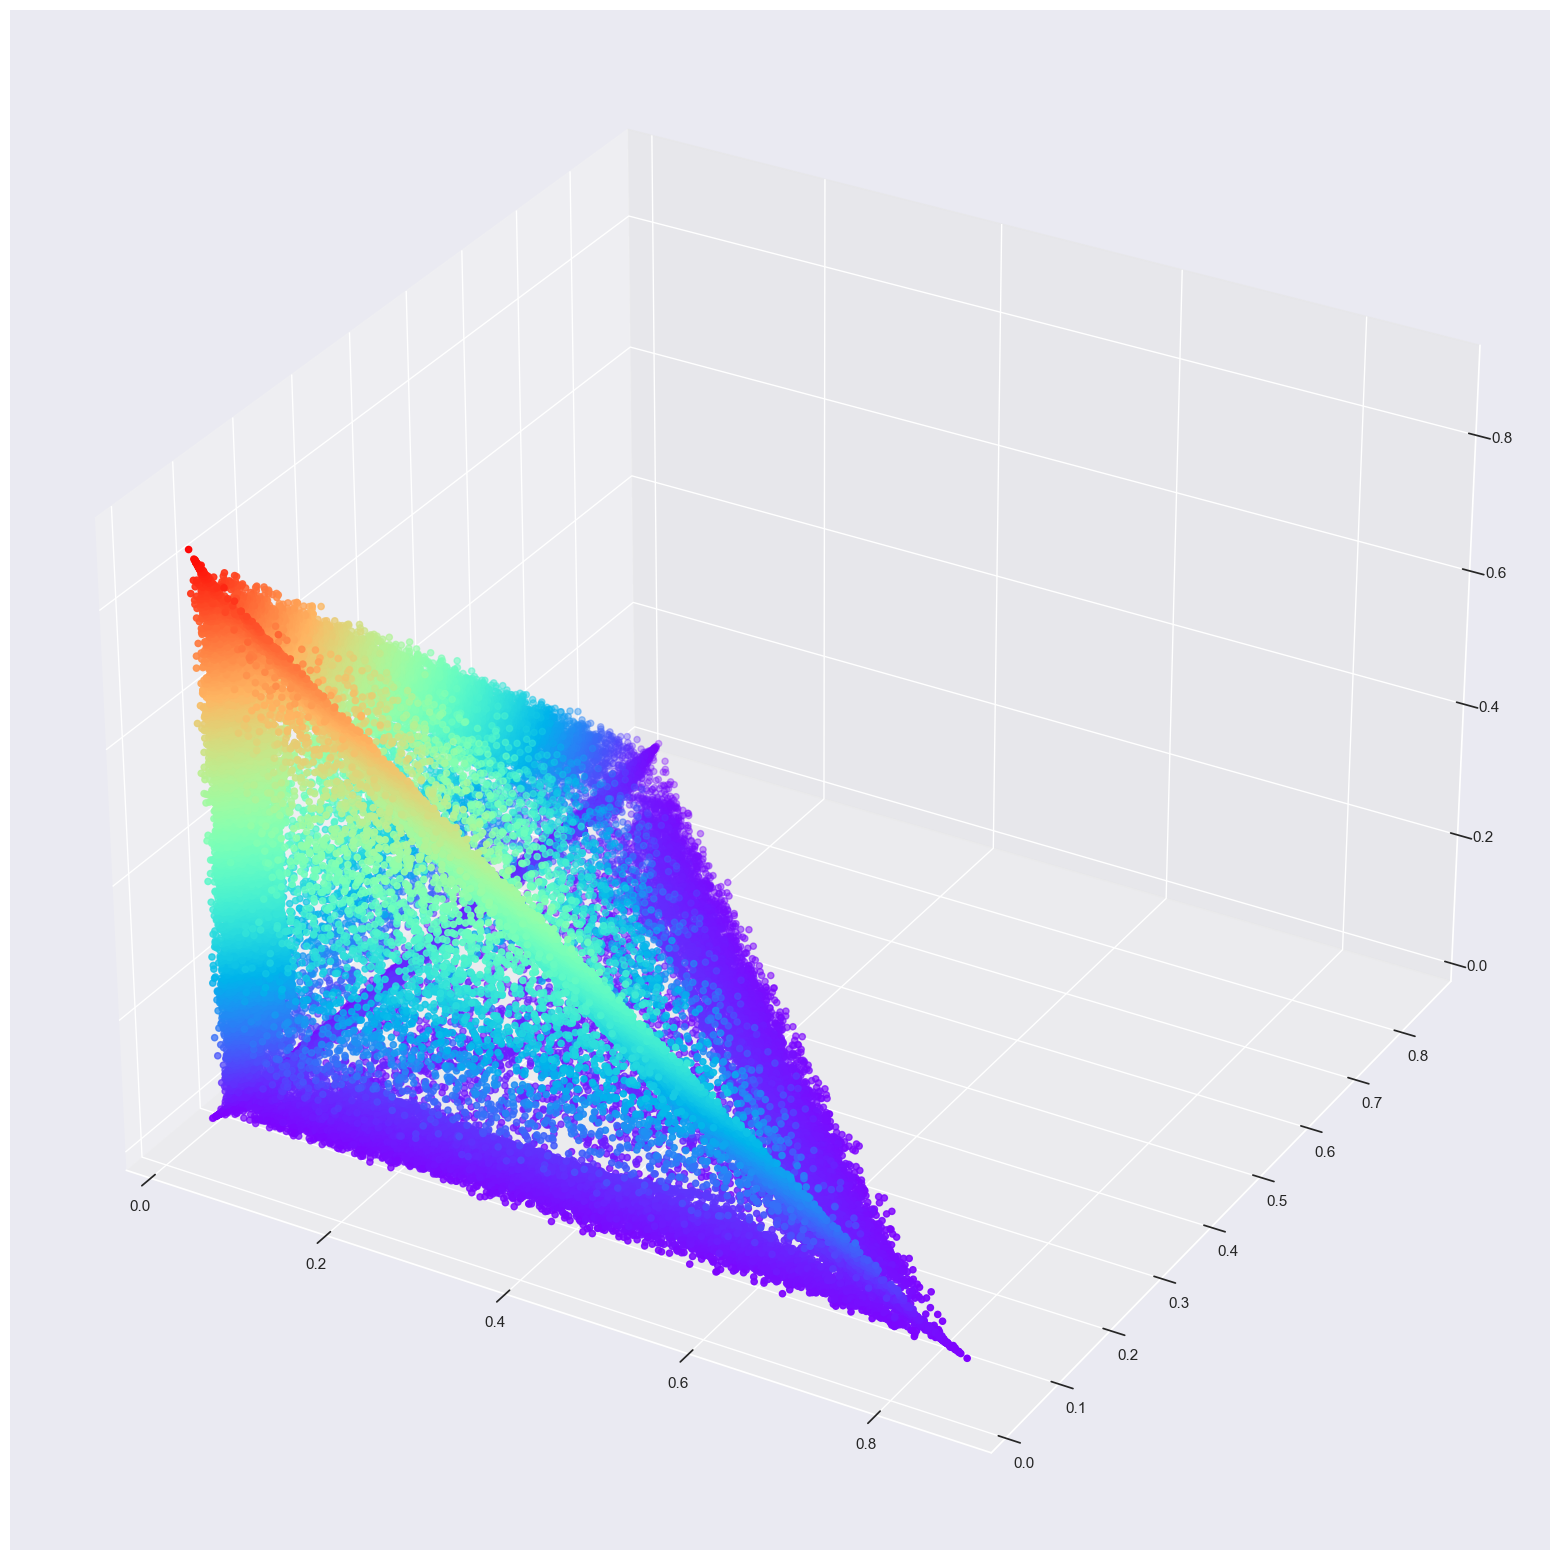

In [67]:
ax = plt.axes(projection='3d')

lda_plot = LatentDirichletAllocation(n_components=3, random_state=0)
X_embedded_pca = lda_tfidf.fit_transform(tfidf_vectors)

sns.set(rc={"figure.figsize":(20,20)})

xdata = X_embedded_pca[:,0]
ydata = X_embedded_pca[:,1]
zdata = X_embedded_pca[:,2]

ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='rainbow')
plt.savefig("pics/dirichlet.png", dpi=300)


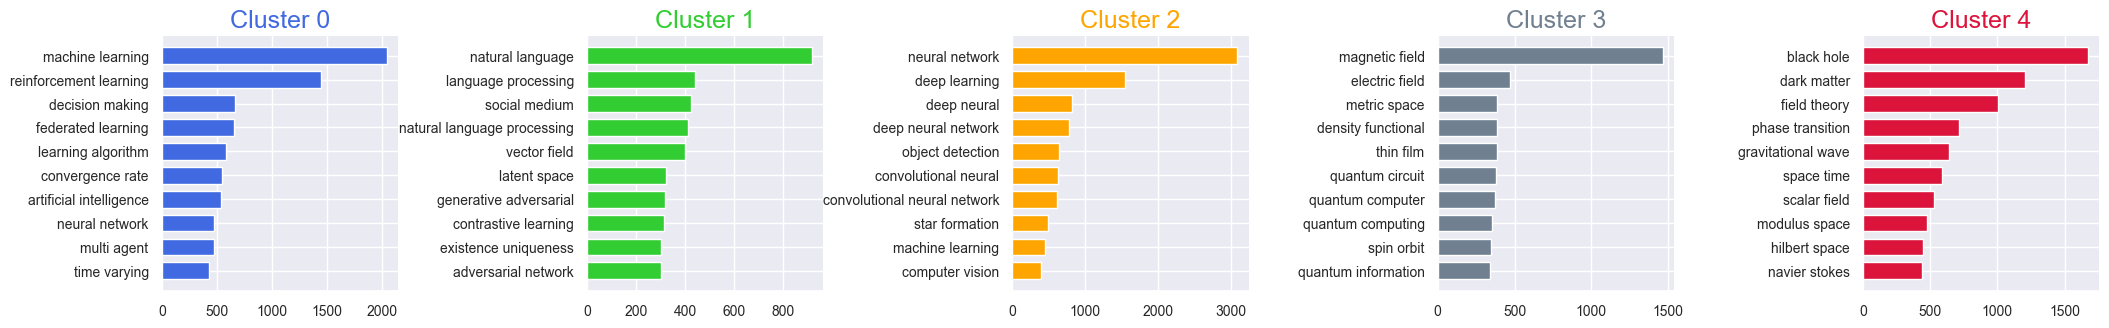

In [39]:
# show the counts of the most important bi- and trigrams of the respective clusters:
# retrieved from https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py

colours = ["royalblue", "limegreen", "orange", "slategrey" , "crimson"] # using same colours for all LDA plots 

fig, axes = plt.subplots(1, 5, figsize=(25, 3))
axes = axes.flatten()

for topic_idx, topic in enumerate(lda_tfidf.components_):
    top_features_ind = topic.argsort()[:-10 - 1:-1]
    top_features = [tfidf_terms[i] for i in top_features_ind]
    weights = topic[top_features_ind]

    ax = axes[topic_idx]
    ax.barh(top_features, weights, height=0.7, color=colours[topic_idx])
    ax.set_title(f'Cluster {topic_idx}',
                    fontdict={'fontsize': 18}, color=colours[topic_idx])
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=10)
    for i in 'top right left'.split():
        ax.spines[i].set_visible(False)
plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.80, hspace=1.3)
plt.savefig("pics/ldashownumbers.png", dpi=120)
plt.show()

## DBSCAN
As another clustering approach, DBSCAN was considered. The following code is about finding the optimal values for *epsilon* and *min_samples*. 
Due to the fact, that there were no parameter found for suitable clustering, it wasn't pursued further. As future work, the values may be tested with more values.

In [8]:
from sklearn.cluster import DBSCAN
from collections import Counter

pca_eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
pca_min_samples = [100, 200, 300, 400, 500, 600, 700, 800, 900]

pca_no_of_clusters = []
pca_sil_score = []
pca_epsvalues = []
pca_min_samp = []
idx = 0

pca_eps_min_df = pd.DataFrame(columns=["number_clusters", "epsilon", "min_sample", "n_noise", "cl0", "cl1", "cl2", "cl3", "cl4", "cl5", "cl6", "cl7", "cl8"])

for p in range(len(pca_eps_values)):
    for _ in range(len(pca_min_samples)):
        pca_dbscan_cluster = DBSCAN(eps=pca_eps_values[p], min_samples=pca_min_samples[_]).fit(tfidf_lsa)
        pca_epsvalues = pca_eps_values[p]
        
        pca_min_samp = pca_min_samples[_]
        pca_no_of_clusters = len(np.unique(pca_dbscan_cluster.labels_))
        n_noise_ = list(pca_dbscan_cluster.labels_).count(-1)
        cl0 = list(pca_dbscan_cluster.labels_).count(0)
        cl1 = list(pca_dbscan_cluster.labels_).count(1)
        cl2 = list(pca_dbscan_cluster.labels_).count(2)
        cl3 = list(pca_dbscan_cluster.labels_).count(3)
        cl4 = list(pca_dbscan_cluster.labels_).count(4)
        cl5 = list(pca_dbscan_cluster.labels_).count(5)
        cl6 = list(pca_dbscan_cluster.labels_).count(6)
        cl7 = list(pca_dbscan_cluster.labels_).count(7)
        cl8 = list(pca_dbscan_cluster.labels_).count(8)

        pca_eps_min_df.loc[idx]=(pca_no_of_clusters, pca_epsvalues, pca_min_samp, n_noise_, cl0, cl1, cl2, cl3, cl4, cl5, cl6, cl7, cl8)
        idx += 1


pca_eps_min_df.to_csv("data/dbscan_values.csv")

number_clusters  epsilon  min_sample   n_noise       cl0      cl1    cl2  \
0              62.0      0.1       100.0  204110.0     127.0  18305.0  369.0   
1               8.0      0.1       200.0  211840.0   18305.0    359.0  286.0   
2               3.0      0.1       300.0  213262.0   18305.0    308.0    0.0   
3               2.0      0.1       400.0  213570.0   18305.0      0.0    0.0   
4               2.0      0.1       500.0  213570.0   18305.0      0.0    0.0   
..              ...      ...         ...       ...       ...      ...    ...   
76             31.0      0.9       500.0   18177.0  195256.0  18305.0    4.0   
77             26.0      0.9       600.0   26536.0  186969.0  18305.0    7.0   
78             25.0      0.9       700.0   38579.0  174846.0  18305.0    3.0   
79             14.0      0.9       800.0   49040.0  164362.0  18305.0   16.0   
80              5.0      0.9       900.0   60632.0  152868.0  18305.0    1.0   

      cl3    cl4    cl5    cl6    cl7    cl8  
0   155.0  143.0  147.0  137.0  191.0  198.0  
1   372.0  211.0  218.0  284.0    0.0    0.0  
2     0.0    0.0    0.0    0.0    0.0    0.0  
3     0.0    0.0    0.0    0.0    0.0    0.0  
4     0.0    0.0    0.0    0.0    0.0    0.0  
..    ...    ...    ...    ...    ...    ...  
76    1.0    3.0    1.0    1.0    1.0    2.0  
77    6.0    1.0    5.0    1.0    9.0    1.0  
78    2.0   15.0   20.0    1.0    8.0    6.0  
79   29.0    1.0    7.0    1.0   62.0    3.0  
80   69.0    0.0    0.0    0.0    0.0    0.0  

[81 rows x 13 columns]